   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


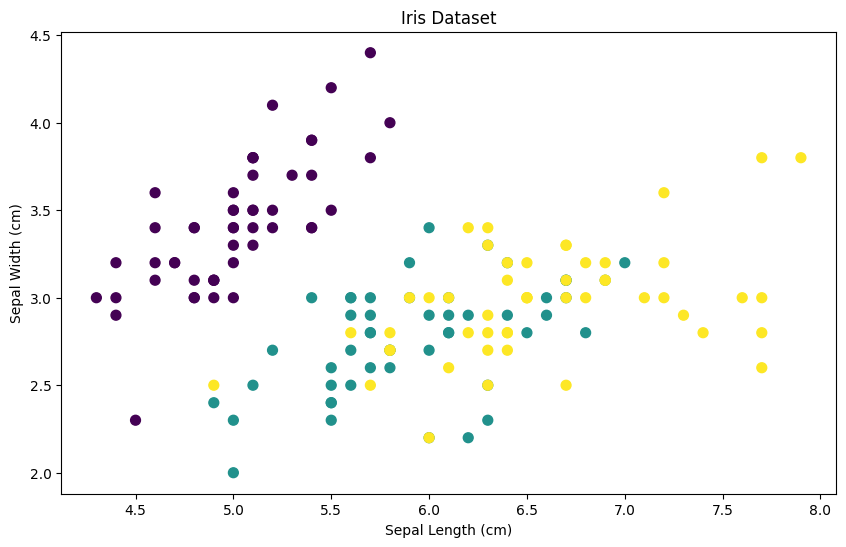

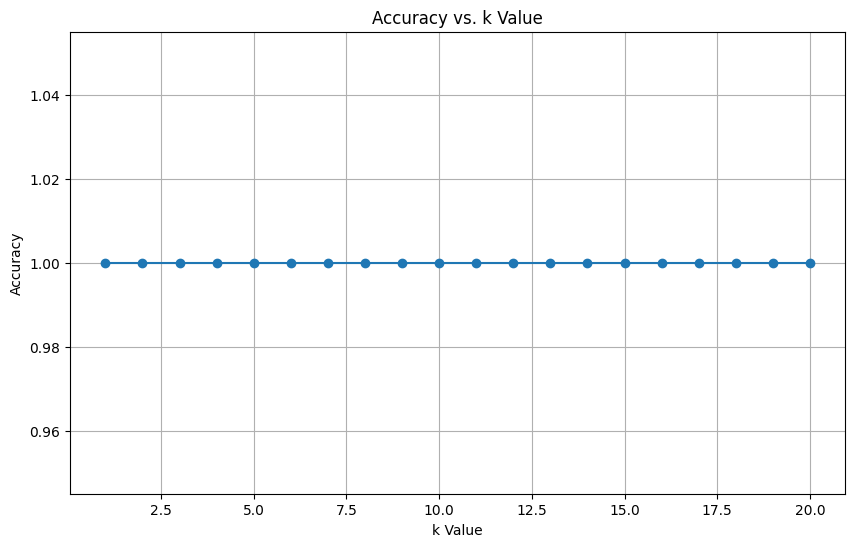

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = pd.read_csv("Iris.csv")

# Display the first few rows of the dataset
print(data.head())

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Species'].astype('category').cat.codes, cmap='viridis', s=50)
plt.title('Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Split the dataset into features (X) and target (y)
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

# Convert species labels to numerical values
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(species_mapping)

# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement k-NN from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x) for x in X_train.values]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train.iloc[i] for i in k_neighbors_indices]
    return np.bincount(k_nearest_labels).argmax()

def predict(X_train, y_train, X_test, k=3):
    predictions = [k_nearest_neighbors(X_train, y_train, x, k) for x in X_test.values]
    return np.array(predictions)

# Evaluate the model for different k values and plot accuracy vs. k
k_values = list(range(1, 21))
accuracy_values = []

for k in k_values:
    y_pred = predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy vs. k graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

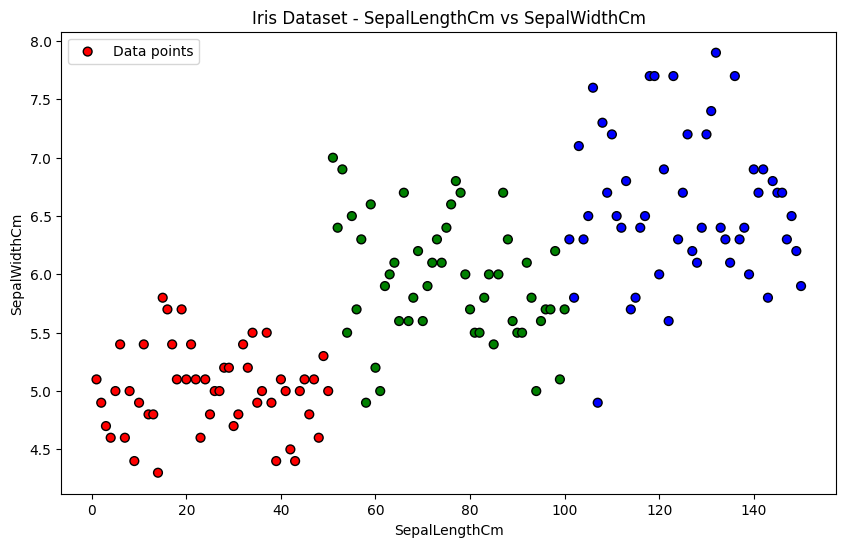

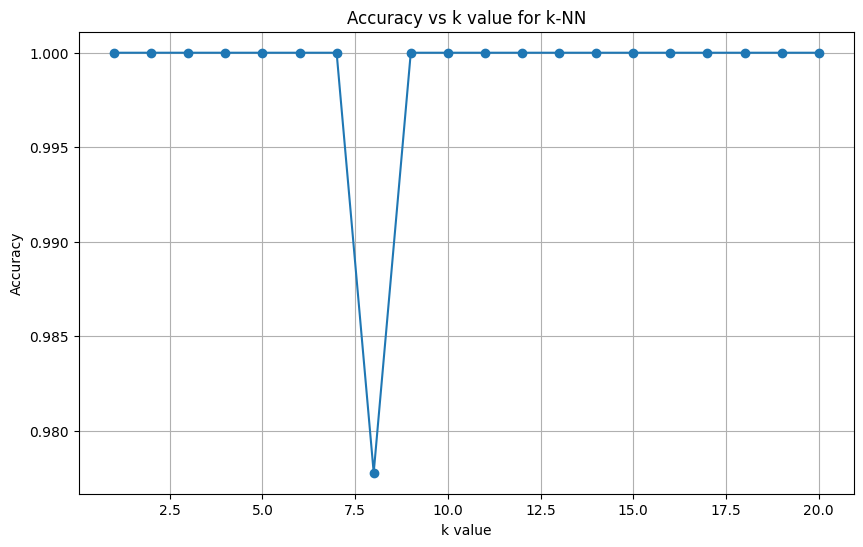

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Iris.csv")

# Display the first few rows of the dataset
print(data.head())

# Separate features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset
plt.figure(figsize=(10, 6))

# Plot the dataset
plt.figure(figsize=(10, 6))

# Create a color map for the species
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
colors = [color_map[species] for species in y]

# Plot SepalLengthCm vs SepalWidthCm
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=40, label='Data points')
plt.title('Iris Dataset - SepalLengthCm vs SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

# Initialize k values for k-NN
k_values = list(range(1, 21))

# Train k-NN classifiers for different k values and evaluate accuracy
accuracy_values = []
for k in k_values:
    # Create k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot accuracy vs k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs k value for k-NN')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
